# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d13/570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Campinas, Sao Paulo, Brazil**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()


leaflet_plot_stations(13,'570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2')

In [6]:
# Others libraries
import numpy as np
#import matplotlib.pyplot as plt
#import pandas as pd

In [8]:
# Collect data by Pandas read CVS in 570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2.cvs
df = pd.read_csv('570fb18cde0c9766865e6670ce2c11b0562a81415c535e51441176a2.csv')
df.head()

,ID,Date,Element,Data_Value
0,AR000087270,2012-03-27,TMIN,99
1,BRM00083566,2007-07-23,TMIN,118
2,UY000001915,2014-02-06,TMAX,350
3,ARM00087121,2009-05-17,TMIN,81
4,BLM00085315,2009-04-22,TMAX,240


In [9]:
# Create new columns by year and Month-Date
df['YY'], df['MM-DD'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))
# Delete leap year
df = df.where(df['MM-DD'] != '02-29')
df.head()

,ID,Date,Element,Data_Value,YY,MM-DD
0,AR000087270,2012-03-27,TMIN,99.0,2012,03-27
1,BRM00083566,2007-07-23,TMIN,118.0,2007,07-23
2,UY000001915,2014-02-06,TMAX,350.0,2014,02-06
3,ARM00087121,2009-05-17,TMIN,81.0,2009,05-17
4,BLM00085315,2009-04-22,TMAX,240.0,2009,04-22


In [10]:
# Obtain the max & min temperatures near Campinas, Brazil between 2005-2014
min_temp = df[(df['Element'] == 'TMIN') & (df['YY'] != '2015')].groupby('MM-DD').aggregate({'Data_Value':np.min})
max_temp = df[(df['Element'] == 'TMAX') & (df['YY'] != '2015')].groupby('MM-DD').aggregate({'Data_Value':np.max})
min_temp.head(), max_temp.head()

(       Data_Value
 MM-DD            
 01-01        50.0
 01-02        68.0
 01-03        56.0
 01-04        66.0
 01-05        55.0,        Data_Value
 MM-DD            
 01-01       435.0
 01-02       421.0
 01-03       418.0
 01-04       415.0
 01-05       432.0)

In [11]:
df2015 = df.where(df['Date'].str.contains('2015')).dropna()
min_temp_2015 = df2015[(df2015['Element'] == 'TMIN')].groupby('MM-DD').aggregate({'Data_Value':np.min})
max_temp_2015 = df2015[(df2015['Element'] == 'TMAX')].groupby('MM-DD').aggregate({'Data_Value':np.max})
df2015.head(), min_temp_2015.head(), max_temp_2015.head()

(             ID        Date Element  Data_Value    YY  MM-DD
 15  BLM00085268  2015-06-13    TMAX       309.0  2015  06-13
 25  PAM00086192  2015-11-12    TMIN       225.0  2015  11-12
 33  ARM00087467  2015-08-24    TMIN        40.0  2015  08-24
 43  BR038484280  2015-02-13    TMAX       316.0  2015  02-13
 48  PAM00086185  2015-07-13    TMIN       190.0  2015  07-13,
        Data_Value
 MM-DD            
 01-01        98.0
 01-02        87.0
 01-03        64.0
 01-04       102.0
 01-05        81.0,
        Data_Value
 MM-DD            
 01-01       404.0
 01-02       398.0
 01-03       356.0
 01-04       330.0
 01-05       384.0)

In [12]:
# 2015 broken records temperatures (highs and lows) in comparison for ten years record (2005-2014).
min_break = np.where(min_temp_2015['Data_Value'] < min_temp['Data_Value'])[0]
max_break = np.where(max_temp_2015['Data_Value'] > max_temp['Data_Value'])[0]
min_break, max_break

(array([ 11,  12,  37,  40,  49,  75,  87, 128, 158, 165, 191, 227, 252,
        255, 282, 283, 284, 285, 307, 311, 312, 324, 325, 328, 345, 363]),
 array([ 10,  26,  77, 153, 154, 166, 167, 168, 169, 201, 217, 218, 242,
        250, 257, 266, 291, 316, 319, 330, 347]))

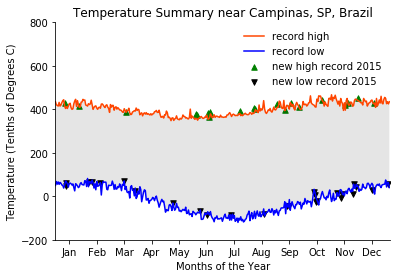

In [13]:
# Bulding the Temperature Summary near Campinas, SP, Brazil
plt.figure()
plt.title('Temperature Summary near Campinas, SP, Brazil')
plt.xlabel('Months of the Year')
plt.ylabel('Temperature (Tenths of Degrees C)')
plt.plot(max_temp.values, 'orangered', label = 'record high')
plt.plot(min_temp.values, 'blue', label = 'record low')
plt.scatter(max_break, max_temp_2015.iloc[max_break], marker='^', s=30, c = 'g', label = 'new high record 2015')
plt.scatter(min_break, min_temp_2015.iloc[min_break], marker='v', s=30, c = 'black', label = 'new low record 2015')
plt.gca().axis([0, 365, -200, 800])

tick_position = [15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345]
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.xticks(tick_position, month_labels)

#plt.xticks(range(0, len(min_temp), 18), min_temp.index[range(0, len(min_temp), 18)], rotation = '60')
plt.legend(loc = 1, frameon = False)
plt.gca().fill_between(range(len(min_temp)), min_temp['Data_Value'], max_temp['Data_Value'], facecolor = 'black', alpha = 0.1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()